### In This we are predicting the Income class label by using the ANN

### importing libraries and reading the data frame

In [ ]:
import pandas as pd
import numpy as np

In [133]:
df = pd.read_csv('income.csv')

In [134]:
df.shape

(30000, 10)

In [135]:
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


### Converting the categorical feautures into non-categorical features using the one-hot encoding and label encoding techniques

In [136]:
df = pd.get_dummies(df, columns=['sex'])

In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
df['education_encoded'] = LabelEncoder().fit_transform(df['education'])

In [139]:
df['marital-status'].unique()

array(['Never-married', 'Married', 'Divorced', 'Widowed', 'Separated',
       'Married-spouse-absent'], dtype=object)

In [140]:
df['marital-status_encoded'] = LabelEncoder().fit_transform(df['marital-status'])

In [141]:
df = pd.get_dummies(df, columns=['workclass'])

In [142]:
df['occupation_encoded'] = LabelEncoder().fit_transform(df['occupation'])

In [143]:
df.columns

Index(['age', 'education', 'education-num', 'marital-status', 'occupation',
       'hours-per-week', 'income', 'label', 'sex_Female', 'sex_Male',
       'education_encoded', 'marital-status_encoded', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp',
       'workclass_State-gov', 'occupation_encoded'],
      dtype='object')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
age                       30000 non-null int64
education                 30000 non-null object
education-num             30000 non-null int64
marital-status            30000 non-null object
occupation                30000 non-null object
hours-per-week            30000 non-null int64
income                    30000 non-null object
label                     30000 non-null int64
sex_Female                30000 non-null uint8
sex_Male                  30000 non-null uint8
education_encoded         30000 non-null int32
marital-status_encoded    30000 non-null int32
workclass_Federal-gov     30000 non-null uint8
workclass_Local-gov       30000 non-null uint8
workclass_Private         30000 non-null uint8
workclass_Self-emp        30000 non-null uint8
workclass_State-gov       30000 non-null uint8
occupation_encoded        30000 non-null int32
dtypes: int32(3), int64(4), object(4), ui

In [145]:
features = ['age','education-num','hours-per-week','sex_Female','sex_Male','education_encoded','marital-status_encoded','workclass_Federal-gov','workclass_Local-gov','workclass_Private','workclass_Self-emp','workclass_State-gov','occupation_encoded']
target = 'label'

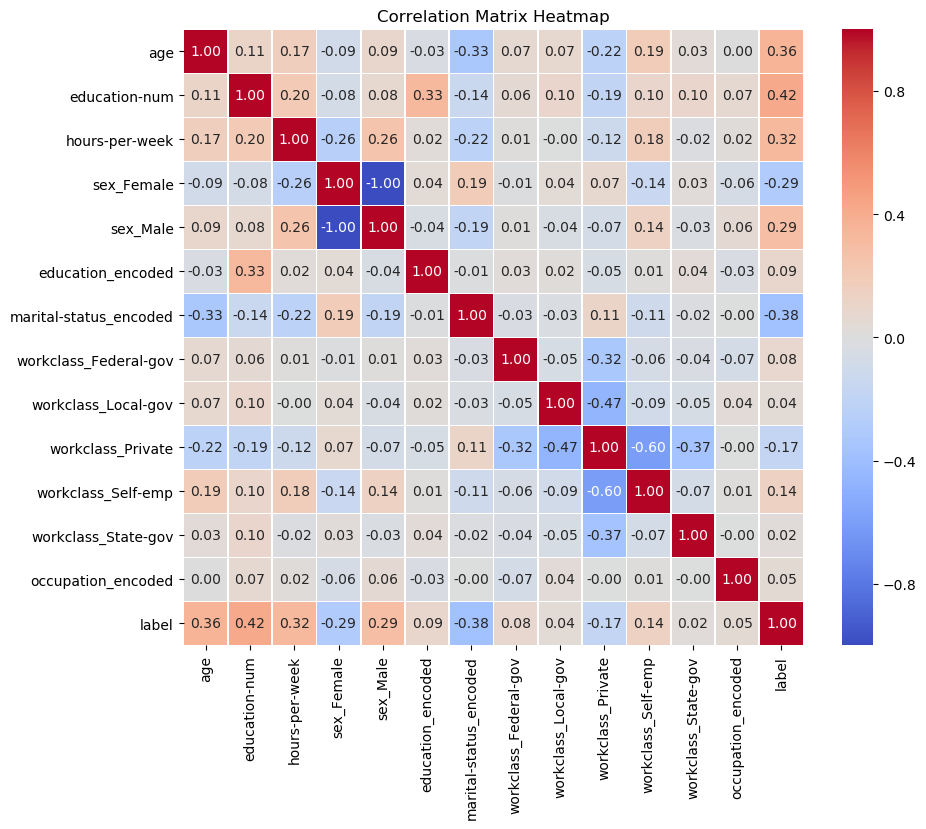

In [146]:
# Select the relevant columns and compute the correlation matrix
correlation_matrix = df[['age', 'education-num', 'hours-per-week', 'sex_Female', 'sex_Male', 
                         'education_encoded', 'marital-status_encoded', 'workclass_Federal-gov', 
                         'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp', 
                         'workclass_State-gov', 'occupation_encoded', 'label']].corr()


import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


### ANN Model building

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [149]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'education-num', 'hours-per-week', 'sex_Female', 'sex_Male', 
                         'education_encoded', 'marital-status_encoded', 'workclass_Federal-gov', 
                         'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp', 
                         'workclass_State-gov', 'occupation_encoded']],df['label'] ,test_size = 0.2, random_state = 32)

#### Converting data frame ----> array to -----> tensors

In [150]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [151]:
X_train = torch.tensor(X_train, dtype = torch.int32)
X_test = torch.tensor(X_test, dtype = torch.int32)
y_train = torch.tensor(y_train, dtype = torch.int32)
y_test = torch.tensor(y_test, dtype = torch.int32)

In [152]:
class ModelBuilding(nn.Module):
    def __init__  (self,in_feat,h1,h2,h3,ou_lay):
        super(ModelBuilding,self).__init__()
        self.fc1 = nn.Linear(in_feat,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.fc4 = nn.Linear(h3,ou_lay)
        
    def feed_forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        
        return X
        

In [153]:
torch.manual_seed(30)
model = ModelBuilding(13,100,50,30,2)

In [154]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [155]:
epochs = 600
losses = []
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.int64)
for i in range(epochs):
    i+=1
    y_pred = model.feed_forward(X_train)
    y_pred.dtype
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i%50 == 1:
        print('epoch--'+str(i)+'loss--'+str(loss))

C:\Users\ramac\anaconda3\anaconda\anaconda\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ramac\anaconda3\anaconda\anaconda\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


epoch--1loss--tensor(1.9393, grad_fn=<NllLossBackward0>)
epoch--51loss--tensor(0.5657, grad_fn=<NllLossBackward0>)
epoch--101loss--tensor(0.4192, grad_fn=<NllLossBackward0>)
epoch--151loss--tensor(0.3693, grad_fn=<NllLossBackward0>)
epoch--201loss--tensor(0.3529, grad_fn=<NllLossBackward0>)
epoch--251loss--tensor(0.3368, grad_fn=<NllLossBackward0>)
epoch--301loss--tensor(0.3166, grad_fn=<NllLossBackward0>)
epoch--351loss--tensor(0.2956, grad_fn=<NllLossBackward0>)
epoch--401loss--tensor(0.2815, grad_fn=<NllLossBackward0>)
epoch--451loss--tensor(0.2722, grad_fn=<NllLossBackward0>)
epoch--501loss--tensor(0.2679, grad_fn=<NllLossBackward0>)
epoch--551loss--tensor(0.2654, grad_fn=<NllLossBackward0>)


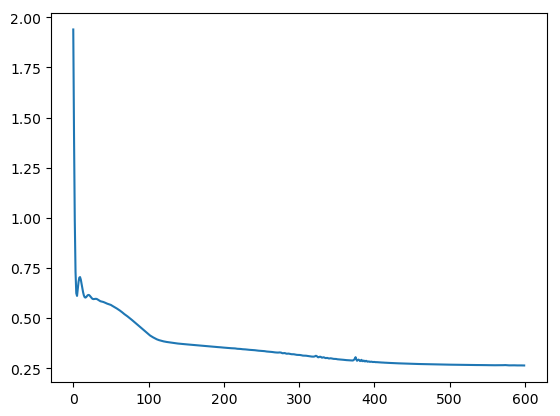

In [ ]:
plt.plot(range(epochs),losses)
plt.xlabel("epochs")
plt.ylabel("loss")

In [160]:
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.int64)
with torch.no_grad():
    y_validation = model.feed_forward(X_test)
    loss = criterion(y_validation, y_test)

C:\Users\ramac\anaconda3\anaconda\anaconda\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
C:\Users\ramac\anaconda3\anaconda\anaconda\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [161]:
loss

tensor(0.2656)

In [174]:
c = 0
for i in range(50):
    predicted_class = model.feed_forward(X_test[i]).argmax(dim=0).item()  
    actual_class = y_test[i].item()  
    
    print('predicted-->' + str(predicted_class) + '   actual-->' + str(actual_class))
    if predicted_class == actual_class:
        c+=1
print(str(c)+' out of '+str(50)+'accuracy--'+str(100*(c/50)))


predicted-->1   actual-->1
predicted-->1   actual-->0
predicted-->0   actual-->0
predicted-->1   actual-->1
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->1   actual-->1
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->1   actual-->1
predicted-->0   actual-->0
predicted-->1   actual-->1
predicted-->1   actual-->0
predicted-->1   actual-->0
predicted-->1   actual-->1
predicted-->1   actual-->0
predicted-->1   actual-->0
predicted-->0   actual-->0
predicted-->1   actual-->1
predicted-->0   actual-->0
predicted-->1   actual-->1
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
predicted-->0   actual-->0
p

In [164]:
y_test[0].item()

1

In [175]:
model

ModelBuilding(
  (fc1): Linear(in_features=13, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=2, bias=True)
)

In [177]:
print("\nWeights and Biases:")
print("Weights of fc1:", model.fc1.weight)
print("Biases of fc1:", model.fc1.bias)
print("Weights of fc2:", model.fc2.weight)
print("Biases of fc2:", model.fc2.bias)
print("Weights of fc3:", model.fc3.weight)
print("Biases of fc3:", model.fc3.bias)


Weights and Biases:
Weights of fc1: Parameter containing:
tensor([[ 0.2082,  0.1351, -0.0282,  ...,  0.1877,  0.1223,  0.1948],
        [-0.0484, -0.1804, -0.0873,  ...,  0.1568,  0.0849, -0.0432],
        [-0.1027,  0.0452, -0.2409,  ..., -0.1630, -0.0689, -0.1772],
        ...,
        [-0.2034, -0.0083,  0.1713,  ..., -0.4232,  0.1260,  0.0611],
        [ 0.1740, -0.3120, -0.2246,  ...,  0.4904, -0.1847, -0.3970],
        [ 0.2166,  0.1911,  0.1130,  ..., -0.1307, -0.1469,  0.1845]],
       requires_grad=True)
Biases of fc1: Parameter containing:
tensor([ 0.1327,  0.2745, -0.0807,  0.4161,  0.2737,  0.1353, -0.0169,  0.2775,
         0.1496,  0.2943,  0.2573,  0.2621,  0.0536, -0.0385,  0.5163, -0.2104,
        -0.4765,  0.2240,  0.0515,  0.5199,  0.1571, -0.1638,  0.1604,  0.1943,
         0.0827, -0.2682, -0.2067,  0.0665, -0.3876, -0.3218, -0.1473, -0.0539,
         0.0570,  0.3283, -0.0378,  0.0541, -0.0842, -0.2785,  0.2908, -0.2812,
        -0.4213,  0.4771,  0.1166,  0.2070,

In [178]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

In [179]:
trainable_params

8042

In [188]:
import torch

# Access the weights of the first layer (fc1)
weights_fc1 = model.fc1.weight.data

# Convert weights to a numpy array for easy handling
weights_fc1 = weights_fc1.numpy()

# Calculate the importance of each input feature based on the absolute value of the weights
feature_importance = abs(weights_fc1).sum(axis=0)  # Sum of absolute values of weights across all neurons
feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Feature importances by FC1 (based on absolute weights):")
for feature_idx, importance in feature_importance_sorted[:5]:  # Top 5 most important features
    print(f"Feature {feature_idx+1}: Importance {importance:.4f}")


Feature importances by FC1 (based on absolute weights):
Feature 9: Importance 21.5677
Feature 12: Importance 19.0683
Feature 11: Importance 17.6770
Feature 8: Importance 17.5194
Feature 4: Importance 17.3123


In [189]:
import torch

# Access the weights of the first layer (fc1)
weights_fc2 = model.fc2.weight.data

# Convert weights to a numpy array for easy handling
weights_fc2 = weights_fc2.numpy()

# Calculate the importance of each input feature based on the absolute value of the weights
feature_importance = abs(weights_fc2).sum(axis=0)  # Sum of absolute values of weights across all neurons
feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Feature importances by FC2 (based on absolute weights):")
for feature_idx, importance in feature_importance_sorted[:5]:  # Top 5 most important features
    print(f"Feature {feature_idx+1}: Importance {importance:.4f}")


Feature importances by FC2 (based on absolute weights):
Feature 4: Importance 15.6607
Feature 78: Importance 9.4938
Feature 21: Importance 7.0920
Feature 90: Importance 5.3431
Feature 20: Importance 5.1515


In [190]:
import torch

# Access the weights of the first layer (fc1)
weights_fc3 = model.fc3.weight.data

# Convert weights to a numpy array for easy handling
weights_fc3 = weights_fc3.numpy()

# Calculate the importance of each input feature based on the absolute value of the weights
feature_importance = abs(weights_fc3).sum(axis=0)  # Sum of absolute values of weights across all neurons
feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Feature importances by FC3 (based on absolute weights):")
for feature_idx, importance in feature_importance_sorted[:5]:  # Top 5 most important features
    print(f"Feature {feature_idx+1}: Importance {importance:.4f}")


Feature importances by FC3 (based on absolute weights):
Feature 19: Importance 9.2447
Feature 27: Importance 4.9420
Feature 32: Importance 2.6817
Feature 29: Importance 2.6737
Feature 34: Importance 2.6712


In [204]:
features[9],features[12],features[11],features[8],features[4]

('workclass_Private',
 'occupation_encoded',
 'workclass_State-gov',
 'workclass_Local-gov',
 'sex_Male')

In [205]:
# Example list of feature names (adjust this to your actual feature names)
feature_names = features
# Access the weights of the first layer (fc1)
weights_fc1 = model.fc1.weight.data

# Convert weights to a numpy array for easy handling
weights_fc1 = weights_fc1.numpy()

# Calculate the importance of each input feature based on the absolute value of the weights
feature_importance = abs(weights_fc1).sum(axis=0)  # Sum of absolute values of weights across all neurons
feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1], reverse=True)

# Print the most important features with names
print("Feature importances (based on absolute weights):")
for feature_idx, importance in feature_importance_sorted[:5]:  # Top 5 most important features
    print(f"{feature_names[feature_idx]}: Importance {importance:.4f}")


Feature importances (based on absolute weights):
workclass_Local-gov: Importance 21.5677
workclass_State-gov: Importance 19.0683
workclass_Self-emp: Importance 17.6770
workclass_Federal-gov: Importance 17.5194
sex_Female: Importance 17.3123


In [198]:
weights_fc1 = model.fc1.weight.data

# Convert weights to a numpy array for easy handling
weights_fc1 = weights_fc1.numpy()

# Calculate the importance of each input feature based on the absolute value of the weights
feature_importance = abs(weights_fc1).sum(axis=0) 

In [201]:
feature_importance[0]

13.885289

In [200]:
weights_fc1

array([[ 0.20817858,  0.13511436, -0.02819554, ...,  0.1876894 ,
         0.12232443,  0.19484082],
       [-0.04840033, -0.18037722, -0.08728585, ...,  0.15678772,
         0.08494908, -0.04322255],
       [-0.10267068,  0.04519433, -0.24094178, ..., -0.16296639,
        -0.06890087, -0.17722127],
       ...,
       [-0.20337966, -0.00833072,  0.17130946, ..., -0.42319727,
         0.12599671,  0.06111782],
       [ 0.17400485, -0.31196663, -0.22459766, ...,  0.49035653,
        -0.18471031, -0.39695266],
       [ 0.21662655,  0.19107676,  0.11304237, ..., -0.13068692,
        -0.14687455,  0.18448189]], dtype=float32)